In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
data1 = pd.read_csv('/content/predictions_csv.csv')

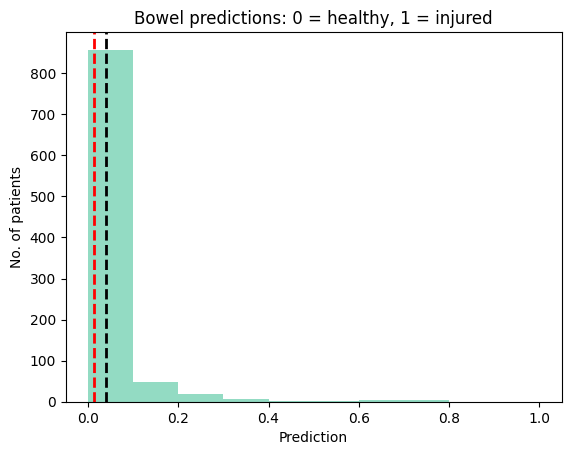

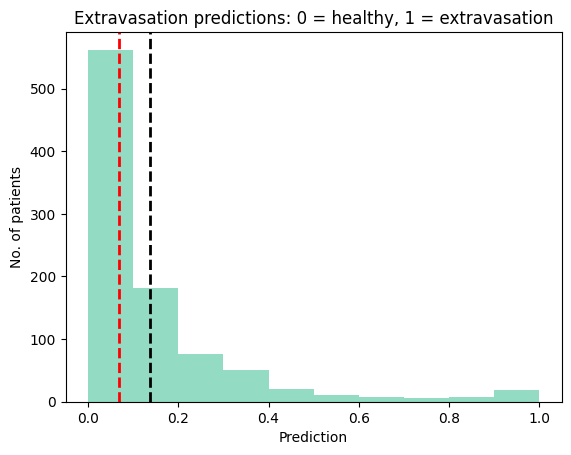

In [3]:
plt.figure(1)
plt.hist(data1.Bowel_injury, range=(0,1.0), label='Prediction', color='mediumaquamarine', alpha=0.7)
plt.axvline(data1.Bowel_injury.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Bowel_injury.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Bowel predictions: 0 = healthy, 1 = injured')
plt.show()
plt.figure(2)
plt.hist(data1.Extravasation_injury, range=(0,1.0), label='Prediction', color='mediumaquamarine', alpha=0.7)
plt.axvline(data1.Extravasation_injury.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Extravasation_injury.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Extravasation predictions: 0 = healthy, 1 = extravasation')
plt.show()

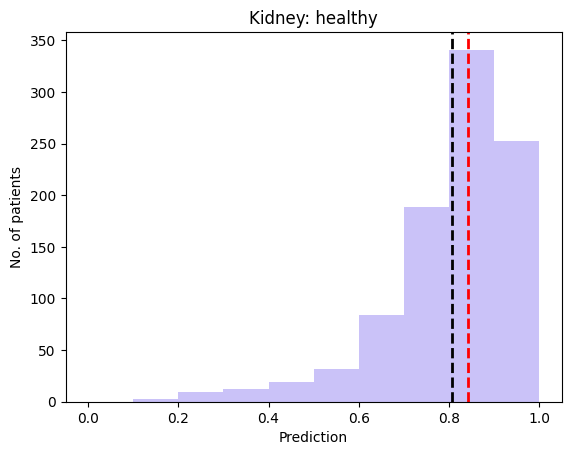

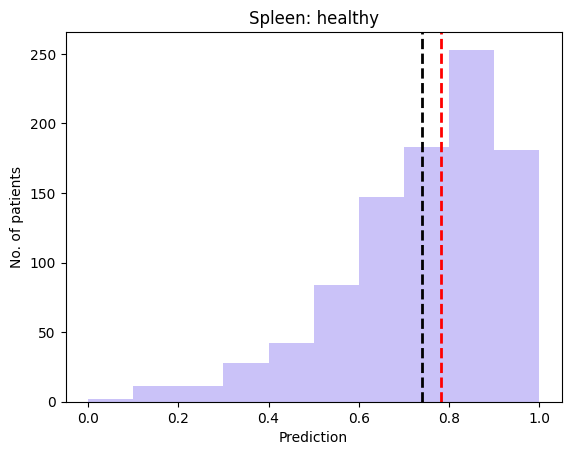

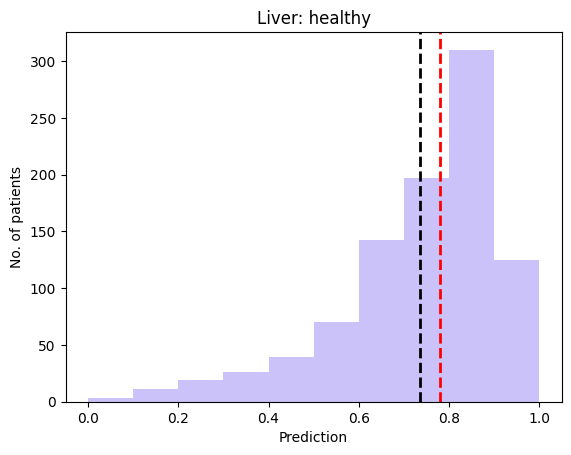

In [4]:
plt.figure(1)
plt.hist(data1.Kidney_healthy, range=(0,1.0), label='Prediction', color='mediumslateblue', alpha=0.4)
plt.axvline(data1.Kidney_healthy.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Kidney_healthy.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Kidney: healthy')
plt.show()
plt.figure(2)
plt.hist(data1.Spleen_healthy, range=(0,1.0), label='Prediction', color='mediumslateblue', alpha=0.4)
plt.axvline(data1.Spleen_healthy.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Spleen_healthy.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Spleen: healthy')
plt.show()
plt.figure(3)
plt.hist(data1.Liver_healthy, range=(0,1.0), label='Prediction', color='mediumslateblue', alpha=0.4)
plt.axvline(data1.Liver_healthy.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Liver_healthy.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Liver: healthy')
plt.show()

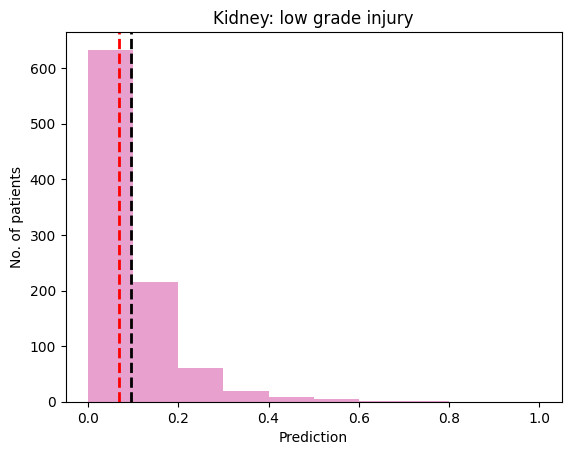

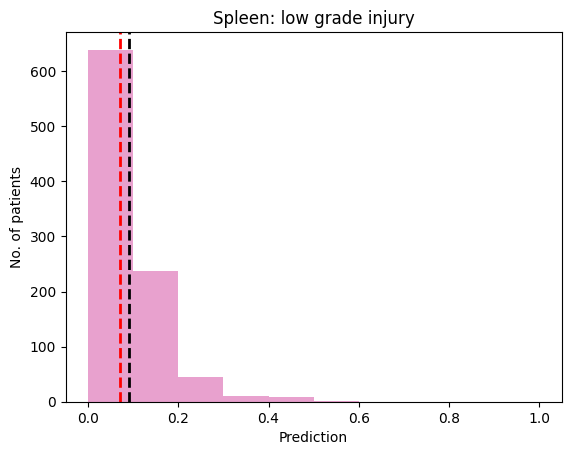

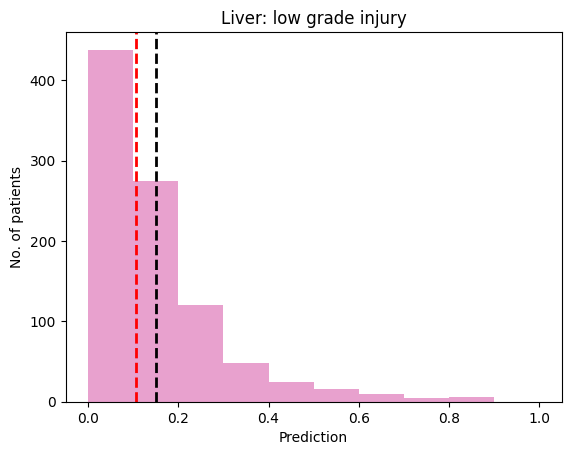

In [5]:
plt.figure(1)
plt.hist(data1.Kidney_low, range=(0,1.0), label='Prediction', color='mediumvioletred', alpha=0.4)
plt.axvline(data1.Kidney_low.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Kidney_low.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Kidney: low grade injury')
plt.show()
plt.figure(2)
plt.hist(data1.Spleen_low, range=(0,1.0), label='Prediction', color='mediumvioletred', alpha=0.4)
plt.axvline(data1.Spleen_low.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Spleen_low.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Spleen: low grade injury')
plt.show()
plt.figure(3)
plt.hist(data1.Liver_low, range=(0,1.0), label='Prediction', color='mediumvioletred', alpha=0.4)
plt.axvline(data1.Liver_low.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Liver_low.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Liver: low grade injury')
plt.show()

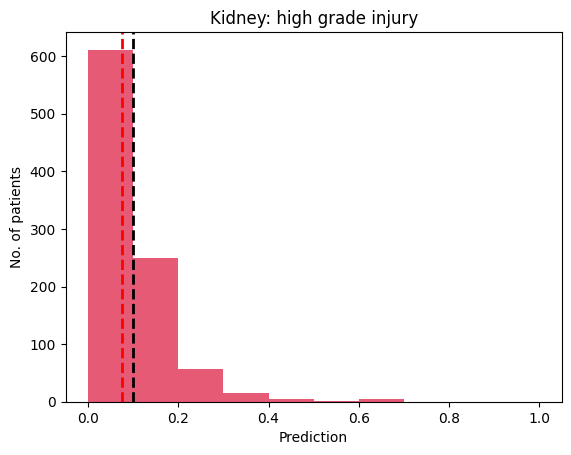

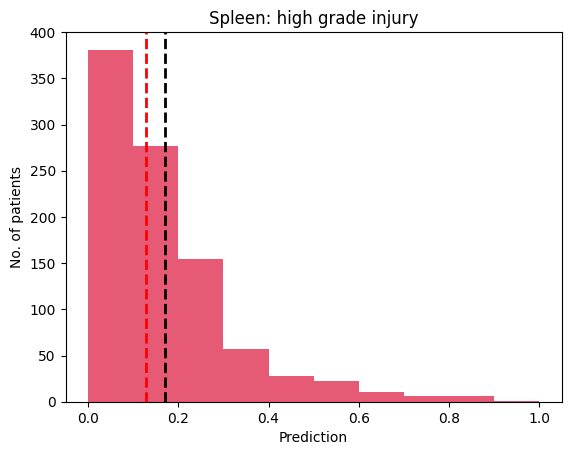

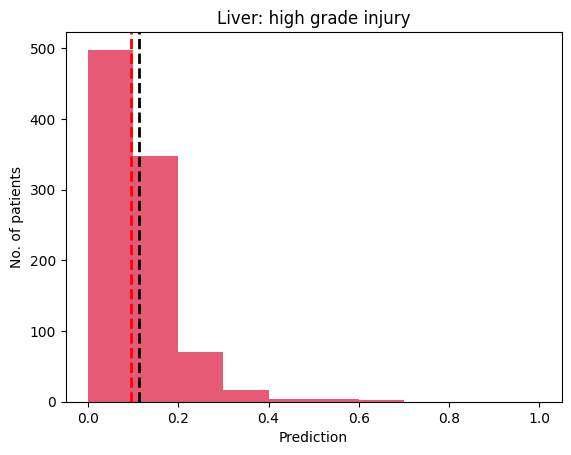

In [6]:
plt.figure(1)
plt.hist(data1.Kidney_high, range=(0,1.0), label='Prediction', color='crimson', alpha=0.7)
plt.axvline(data1.Kidney_high.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Kidney_high.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Kidney: high grade injury')
plt.show()
plt.figure(2)
plt.hist(data1.Spleen_high, range=(0,1.0), label='Prediction', color='crimson', alpha=0.7)
plt.axvline(data1.Spleen_high.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Spleen_high.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Spleen: high grade injury')
plt.show()
plt.figure(3)
plt.hist(data1.Liver_high, range=(0,1.0), label='Prediction', color='crimson', alpha=0.7)
plt.axvline(data1.Liver_high.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data1.Liver_high.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('No. of patients')
plt.title('Liver: high grade injury')
plt.show()

In [17]:
df=data1 #creat a column any_injury, 0 if helathy, 1 if any injury is present
df['Any_injury'] = np.where(
    (df['Bowel_injury'] > 0.5) |
    (df['Extravasation_injury'] > 0.5) |
    (df['Kidney_high'] > 0.5) |
    (df['Kidney_low'] > 0.5) |
    (df['Liver_high'] > 0.5) |
    (df['Liver_low'] > 0.5) |
    (df['Spleen_high'] > 0.5) |
    (df['Spleen_low'] > 0.5),
    1,
    np.where(
        (df['Kidney_healthy'] > 0.5) |
        (df['Liver_healthy'] > 0.5) |
        (df['Spleen_healthy'] > 0.5),
        0,
        0  # Assign any other value if needed
    )
)


df

,Patient,Bowel_injury,Extravasation_injury,Kidney_healthy,Kidney_low,Kidney_high,Liver_healthy,Liver_low,Liver_high,Spleen_healthy,Spleen_low,Spleen_high,Any_injury
0,27291,0.055868,0.060471,0.843784,0.087951,0.068265,0.859270,0.069384,0.071347,0.749351,0.150156,0.100493,0
1,14517,0.018293,0.028474,0.752064,0.118384,0.129552,0.625703,0.238007,0.136290,0.724220,0.138094,0.137685,0
2,32987,0.020117,0.122707,0.924814,0.019277,0.055908,0.642340,0.205929,0.151731,0.722493,0.068097,0.209410,0
3,7904,0.004032,0.007189,0.957620,0.010469,0.031911,0.984821,0.004369,0.010811,0.965207,0.012463,0.022331,0
4,7904,0.021949,0.027983,0.809366,0.044353,0.146281,0.746723,0.101705,0.151572,0.837213,0.056409,0.106378,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,37028,0.000217,0.002526,0.873370,0.090469,0.036161,0.737942,0.108933,0.153125,0.790425,0.043780,0.165795,0
938,18404,0.016733,0.077987,0.746845,0.171773,0.081382,0.719815,0.172211,0.107975,0.710409,0.090854,0.198737,0
939,30698,0.034834,0.151994,0.796346,0.121377,0.082277,0.707737,0.171339,0.120924,0.626427,0.151621,0.221952,0
940,31034,0.004366,0.058384,0.819066,0.056336,0.124599,0.892052,0.069507,0.038440,0.721051,0.157274,0.121674,0


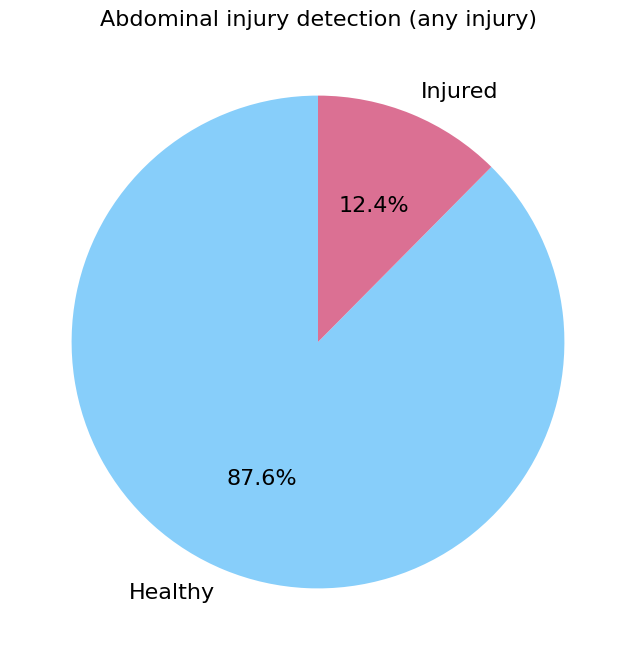

In [20]:
injury_counts = df['Any_injury'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(injury_counts, labels=['Healthy', 'Injured'], autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'palevioletred'], textprops={'fontsize': 16})
plt.title('Abdominal injury detection (any injury)', fontsize=16)
plt.show()